In [9]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
Bank_raw_dataset = pd.read_csv('../data/raw/Bank_telemarketing_data.csv')

In [3]:
Bank_raw_dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [4]:
Bank_raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
Bank_raw_dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


In [ ]:
# visualize the dataset

In [6]:
Bank_raw_dataset.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [7]:
Bank_raw_dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
Bank_raw_dataset.shape

(41188, 21)

C:\Users\ashut\AppData\Local\Temp\ipykernel_23672\3717674211.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=Bank_raw_dataset, palette='Set2')


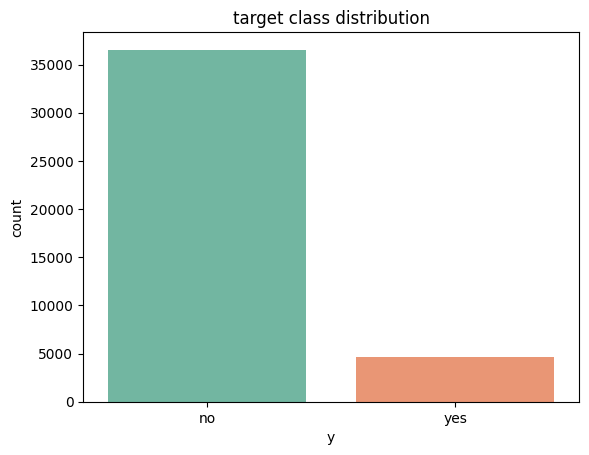

In [13]:
sns.countplot(x='y', data=Bank_raw_dataset, palette='Set2')
plt.title('target class distribution')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

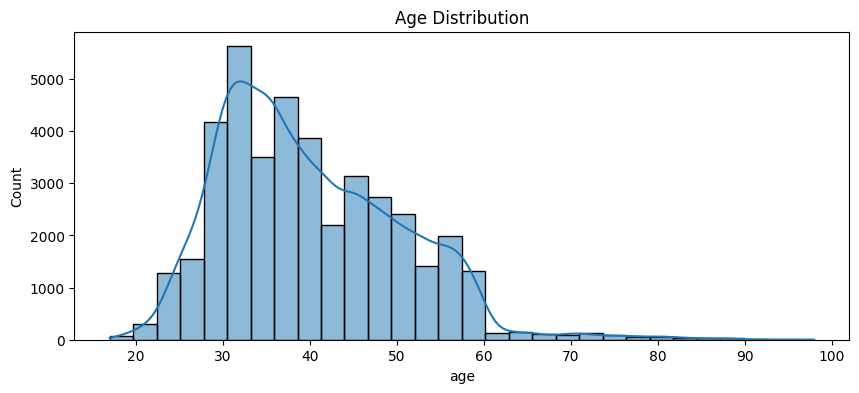

In [12]:
plt.figure(figsize=(10, 4))
sns.histplot(Bank_raw_dataset['age'], bins=30, kde=True)
plt.title('Age Distribution')

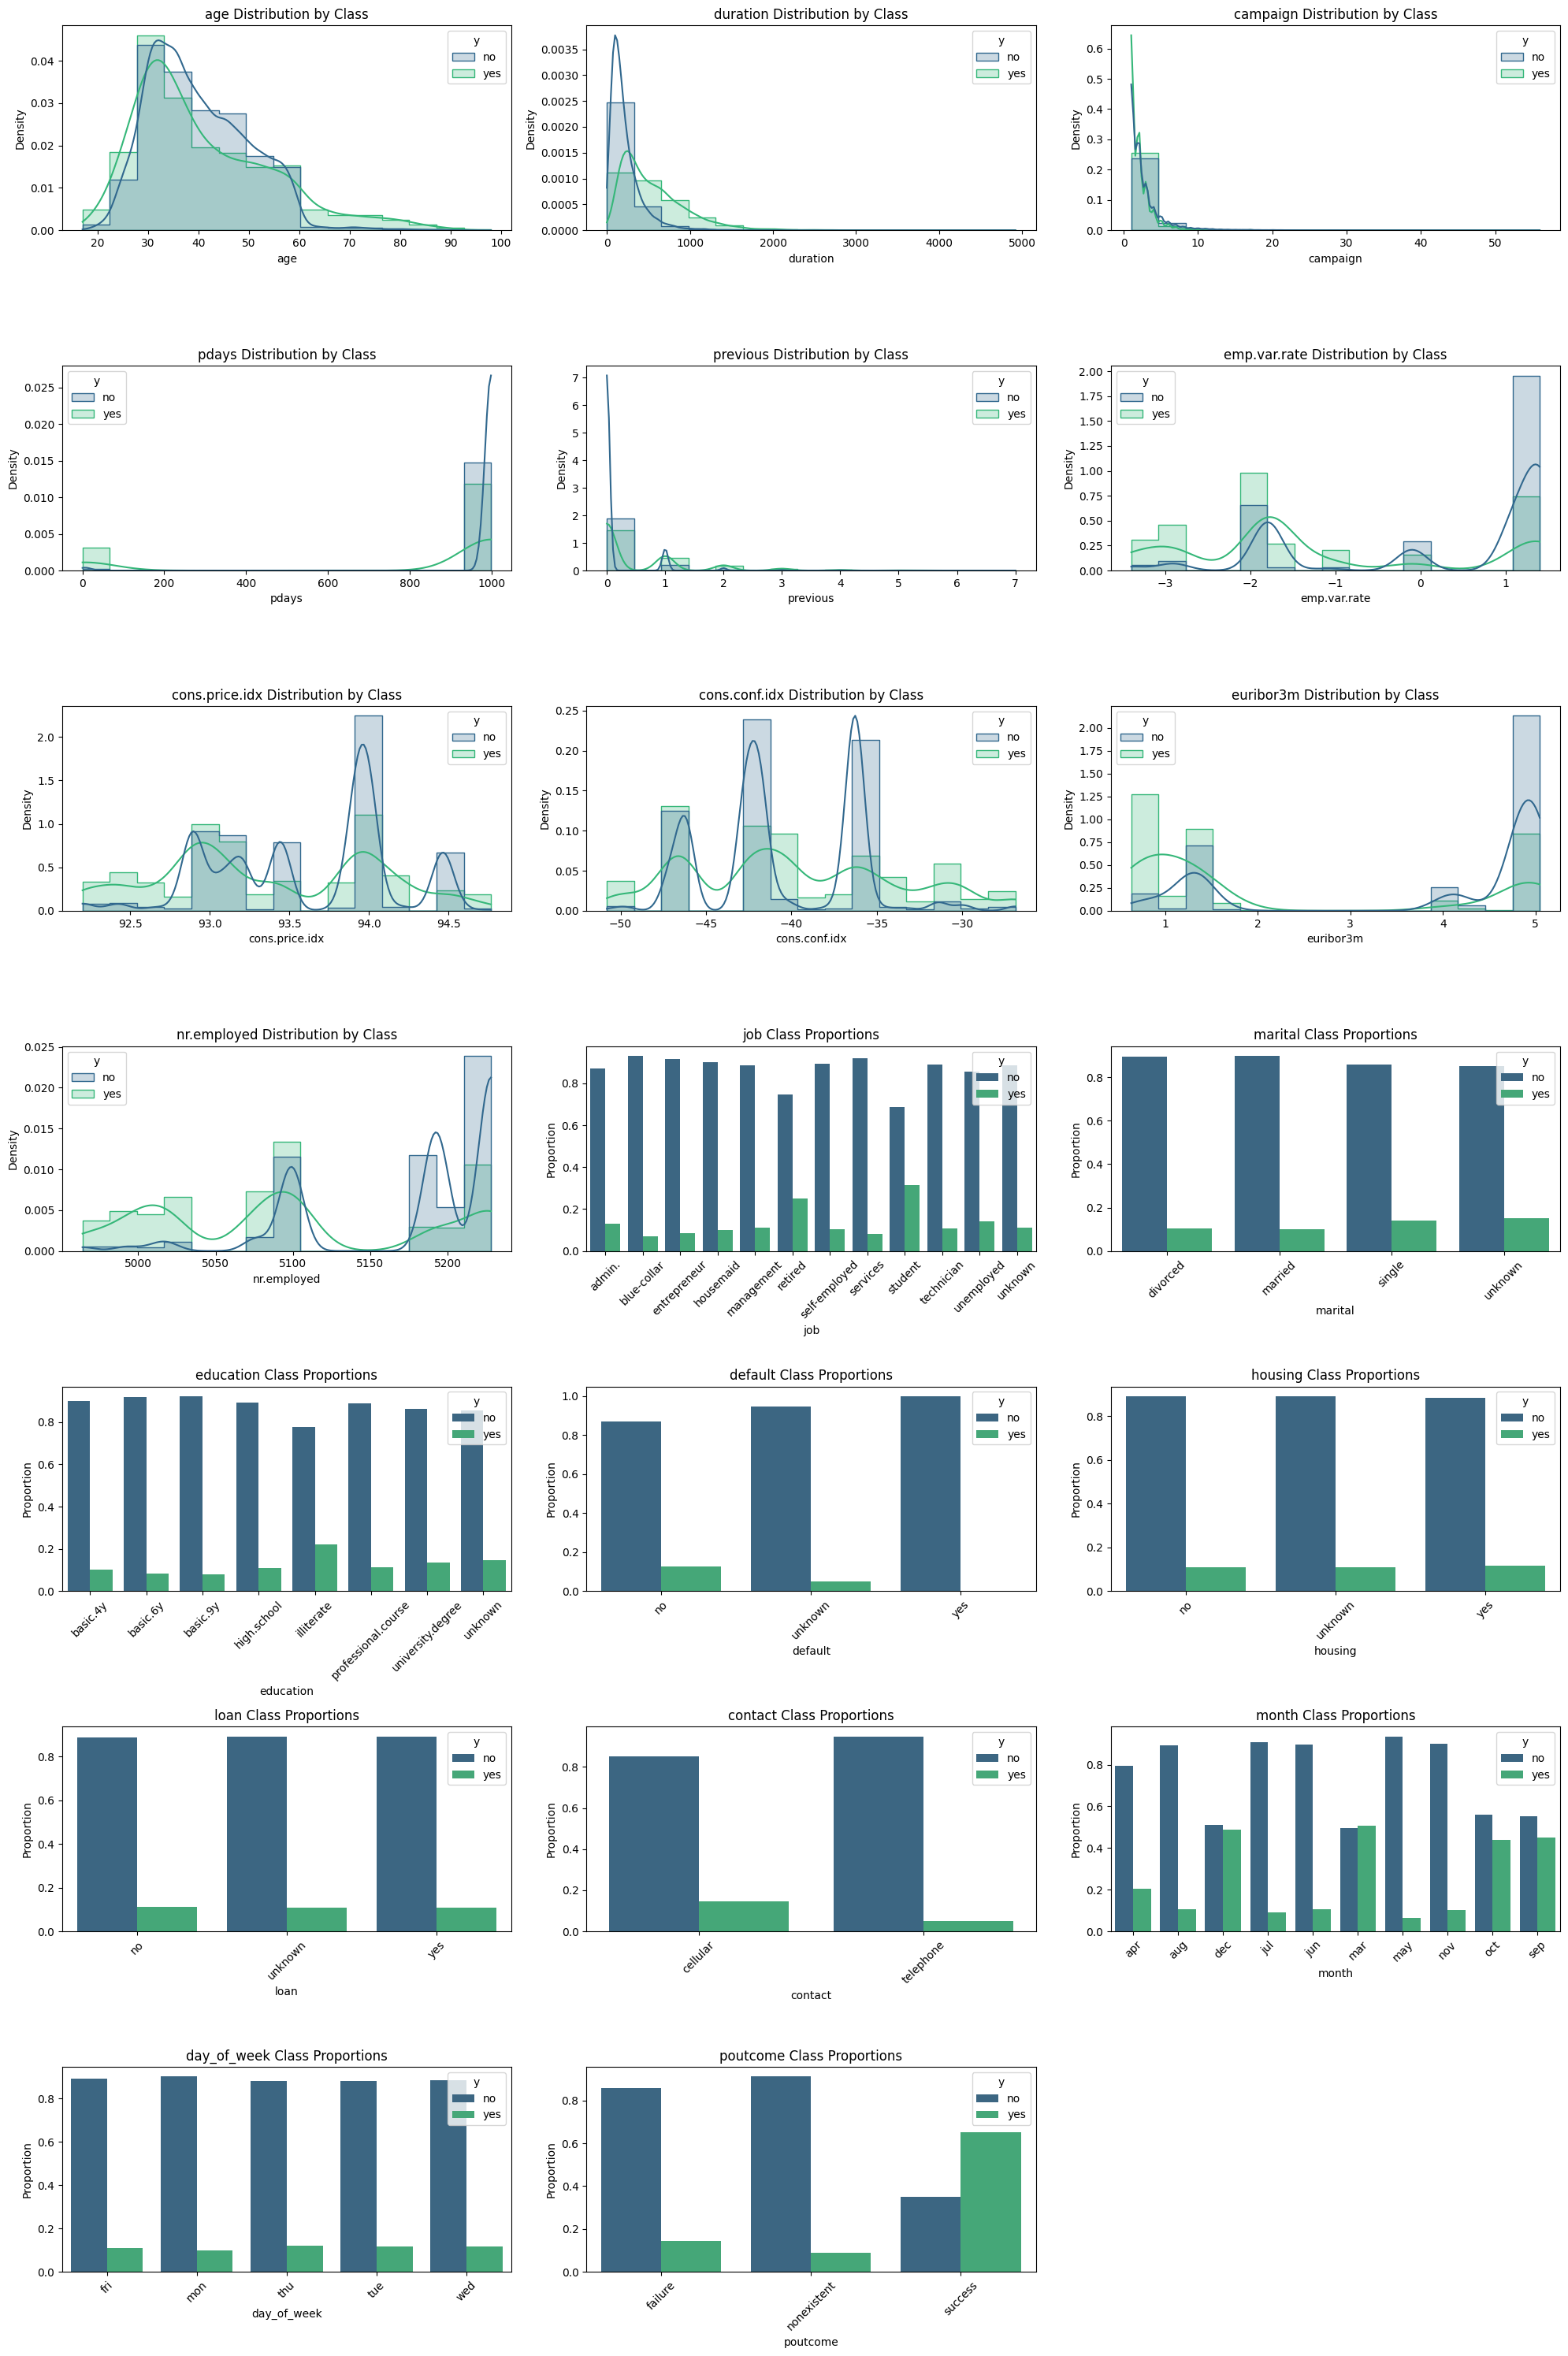

In [16]:
def plot_class_distributions(df, target='y', n_cols=3, figsize=(20, 30)):
    """
    Plots class distributions for all features in the dataset.
    
    Parameters:
    - df: DataFrame containing the data
    - target: Name of the target column (default='y')
    - n_cols: Number of columns in subplot grid
    - figsize: Figure size
    """
    # Separate features from target
    features = [col for col in df.columns if col != target]
    
    # Split features into numerical and categorical
    numerical_features = df[features].select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features = df[features].select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Create subplot grid
    n_rows = (len(features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    
    # Counter for subplots
    plot_idx = 0
    
    # Plot numerical features
    for col in numerical_features:
        ax = axes[plot_idx]
        
        # Bin numerical data for better visualization
        sns.histplot(data=df, x=col, hue=target, bins=15, 
                    kde=True, ax=ax, palette='viridis',
                    element='step', stat='density', common_norm=False)
        ax.set_title(f'{col} Distribution by Class')
        ax.set_xlabel(col)
        ax.set_ylabel('Density')
        plot_idx += 1
    
    # Plot categorical features
    for col in categorical_features:
        ax = axes[plot_idx]
        
        # Calculate proportions for better comparison
        prop_df = (df.groupby(col)[target]
                  .value_counts(normalize=True)
                  .rename('proportion')
                  .reset_index())
        
        sns.barplot(data=prop_df, x=col, y='proportion', 
                   hue=target, ax=ax, palette='viridis')
        ax.set_title(f'{col} Class Proportions')
        ax.set_xlabel(col)
        ax.set_ylabel('Proportion')
        ax.tick_params(axis='x', rotation=45)
        plot_idx += 1
    
    # Hide empty subplots
    for idx in range(plot_idx, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Usage
plot_class_distributions(Bank_raw_dataset)

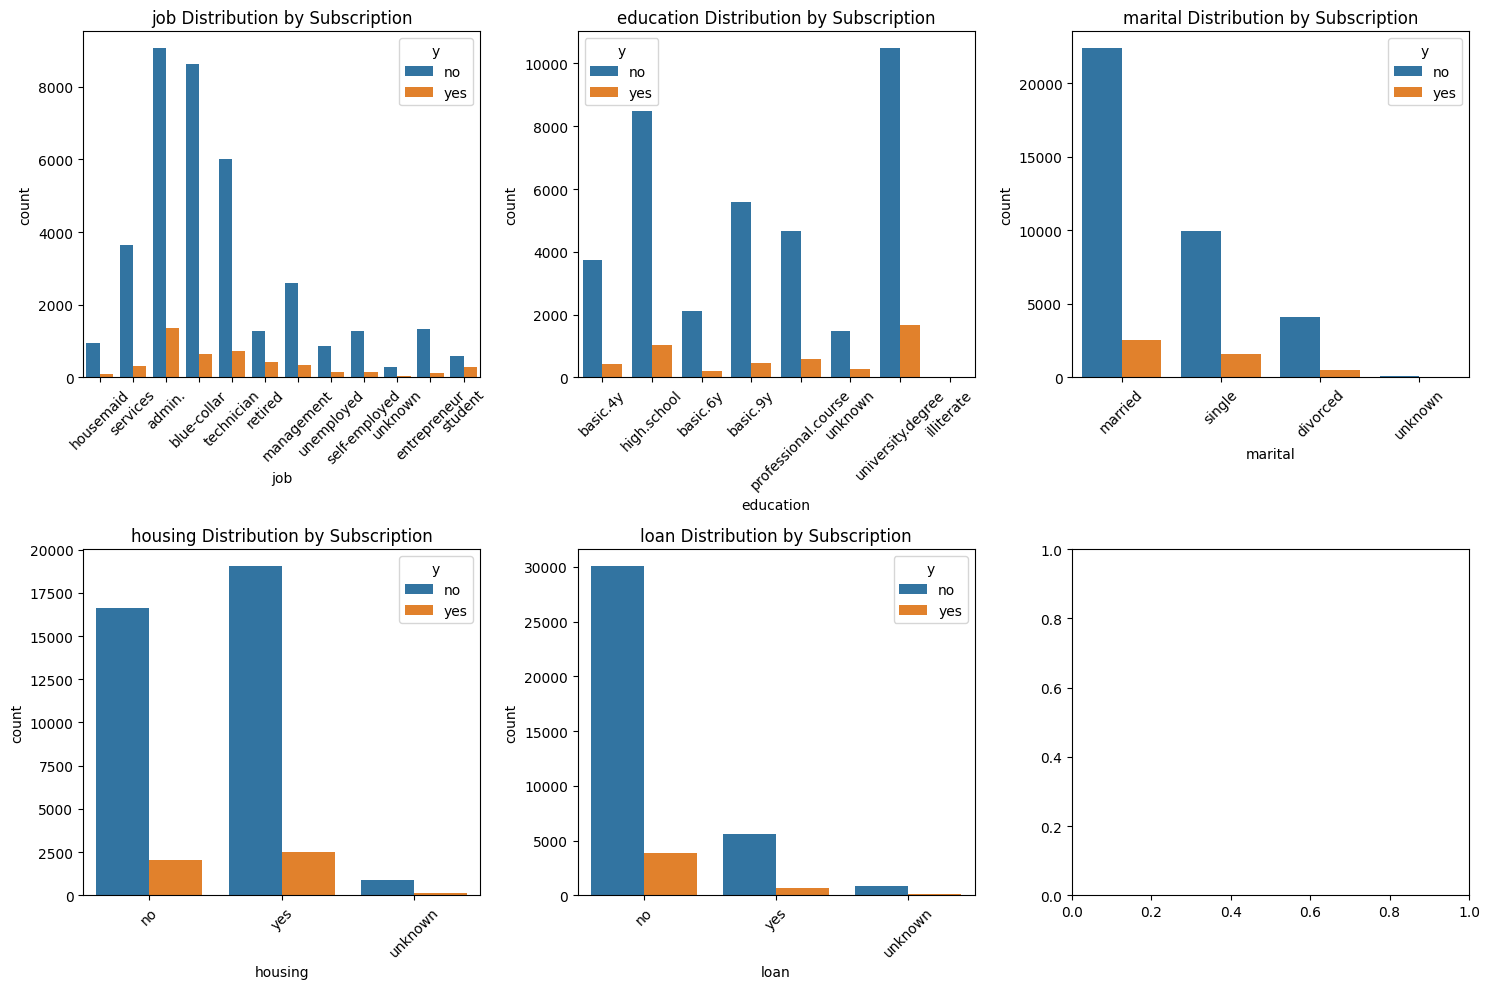

In [17]:
# Then, analyze key categorical features' distribution with respect to the target:

# Key categorical features to analyze
cat_features = ['job', 'education', 'marital', 'housing', 'loan']

# Create subplots for each categorical feature
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(cat_features):
    if idx < len(axes):
        sns.countplot(data=Bank_raw_dataset, x=col, hue='y', ax=axes[idx])
        axes[idx].set_title(f'{col} Distribution by Subscription')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

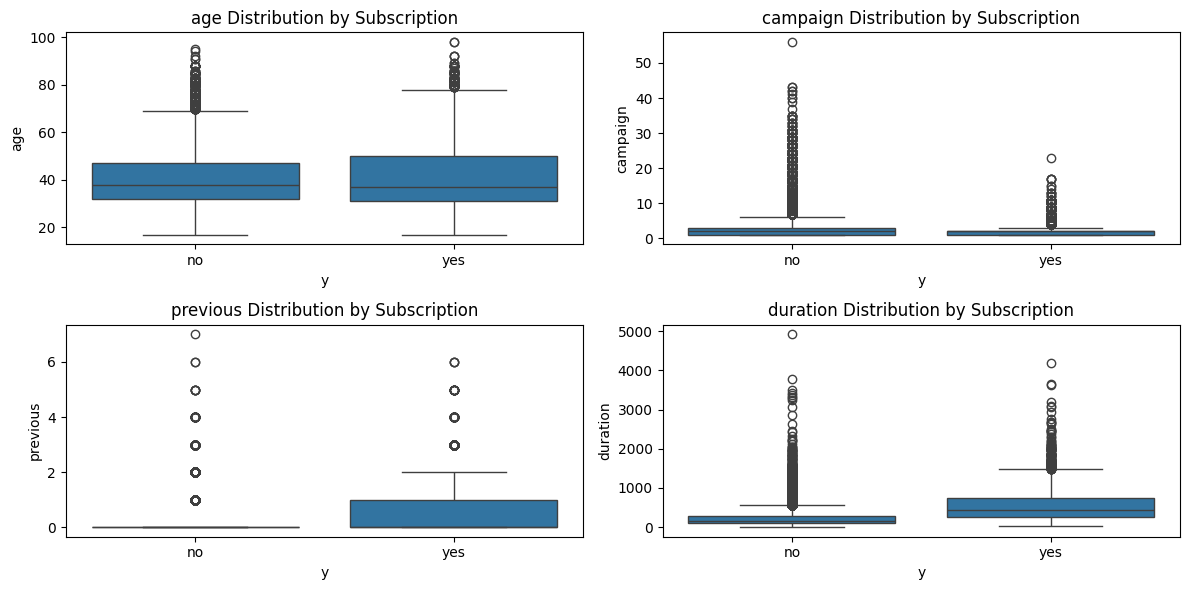

In [18]:
num_features = ['age', 'campaign', 'previous', 'duration']

# Create box plots
plt.figure(figsize=(12, 6))
for idx, col in enumerate(num_features):
    plt.subplot(2, 2, idx+1)
    sns.boxplot(data=Bank_raw_dataset, x='y', y=col)
    plt.title(f'{col} Distribution by Subscription')

plt.tight_layout()
plt.show()

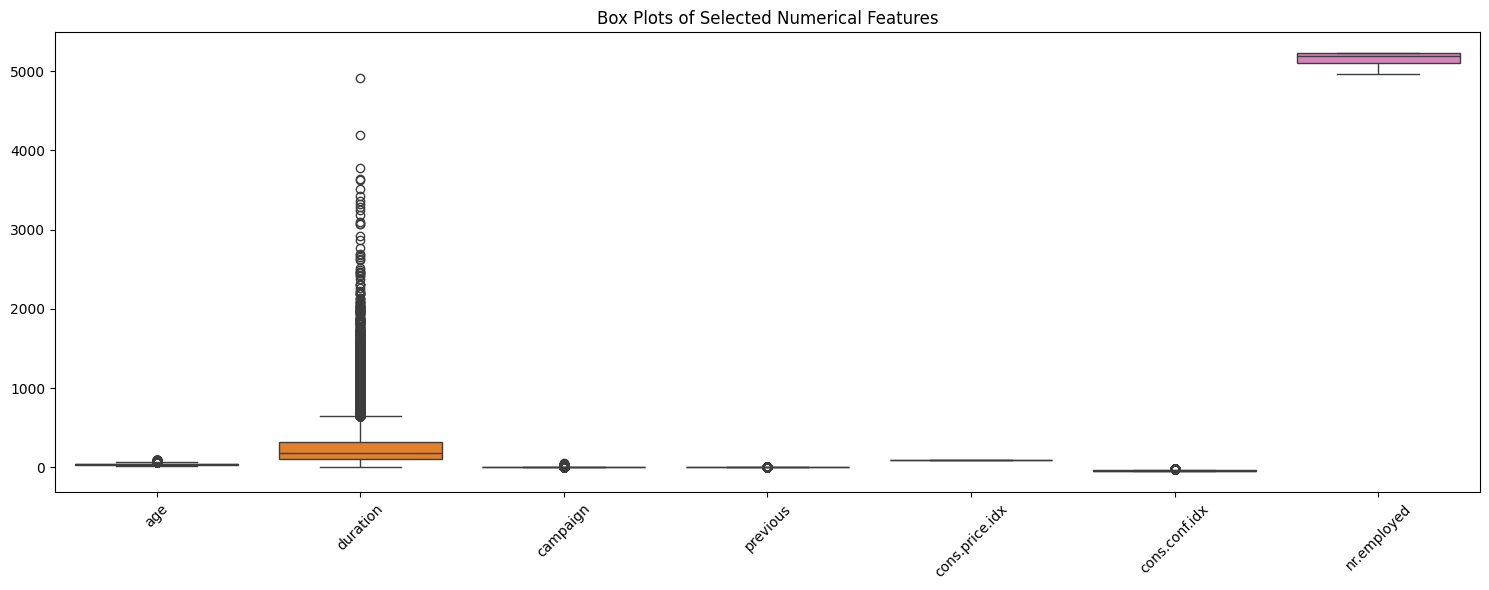

In [19]:
selected_num_features = ['age', 'duration', 'campaign', 'previous', 
                        'cons.price.idx', 'cons.conf.idx', 'nr.employed']

# Create box plots for visual inspection
plt.figure(figsize=(15, 6))
sns.boxplot(data=Bank_raw_dataset[selected_num_features])
plt.xticks(rotation=45)
plt.title('Box Plots of Selected Numerical Features')
plt.tight_layout()
plt.show()

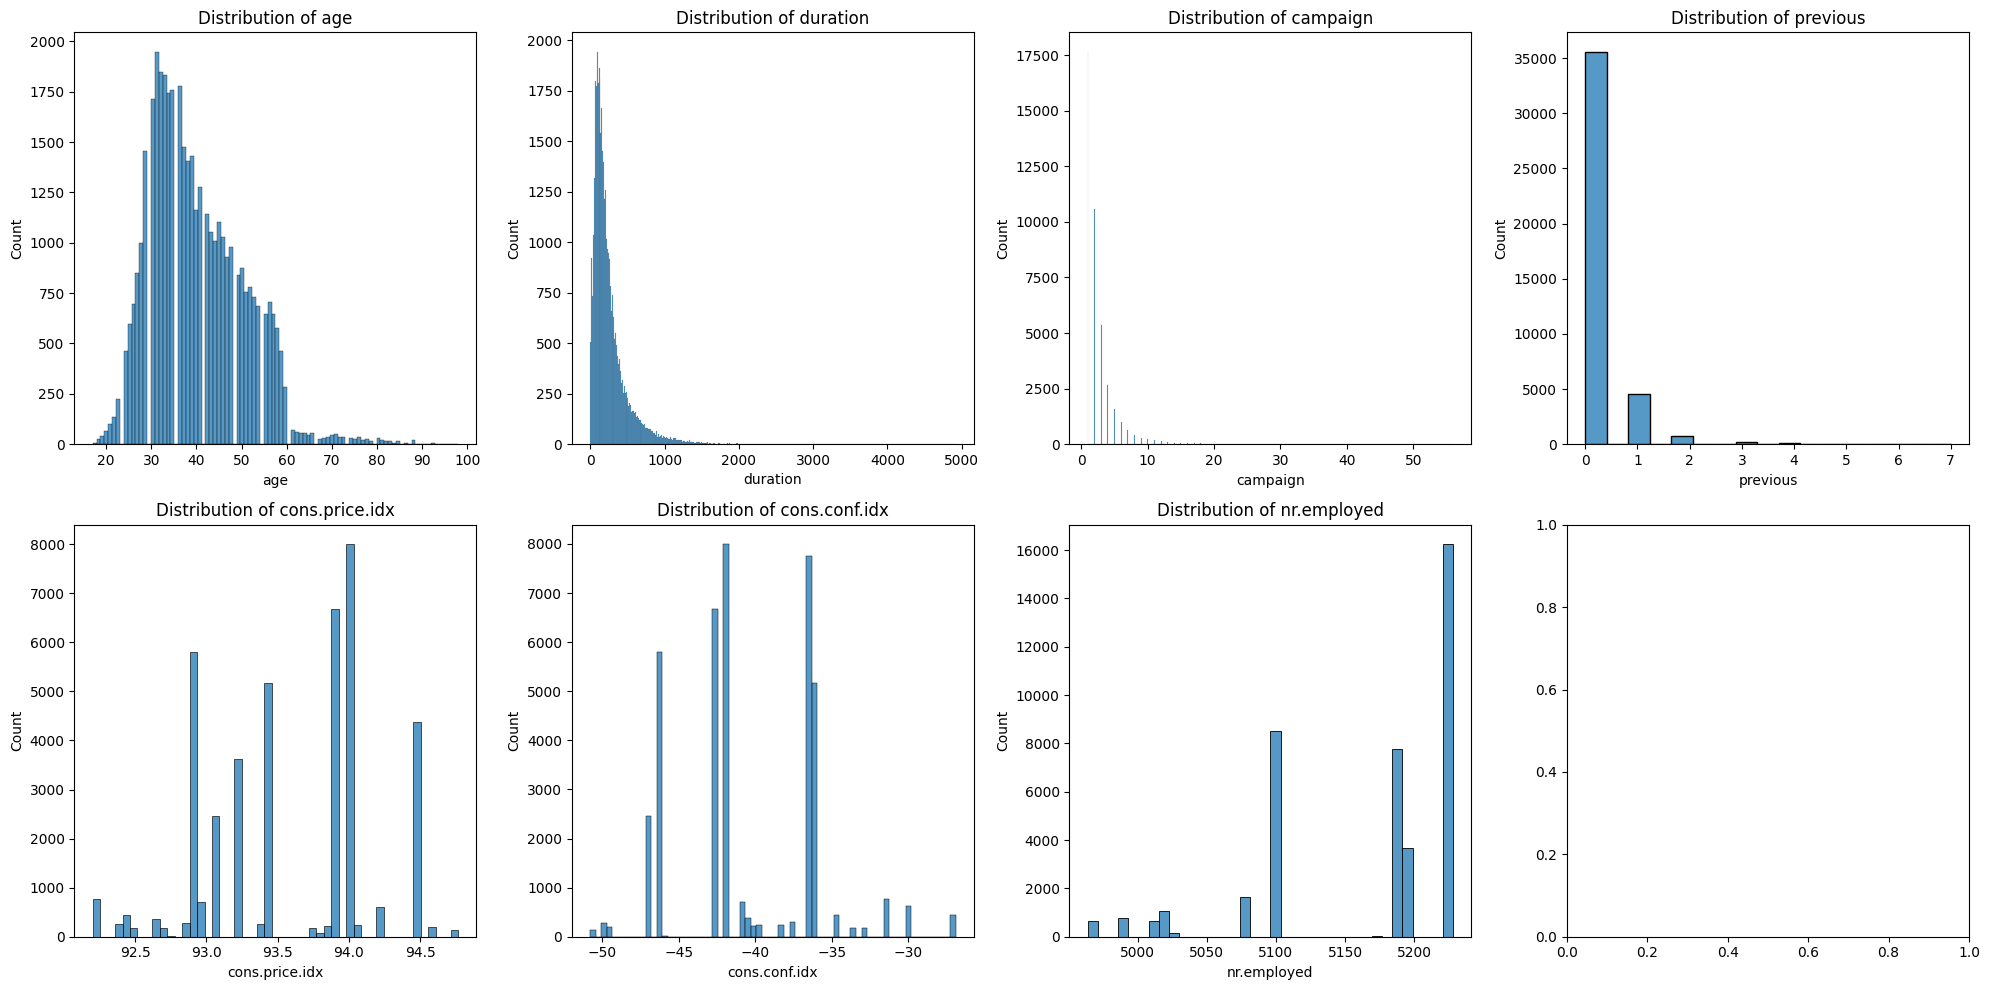

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(selected_num_features):
    sns.histplot(data=Bank_raw_dataset, x=feature, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [25]:
from scipy import stats
def detect_outliers(df, features):
    """
    Detect outliers using multiple methods and return summary
    """
    outlier_summary = {}
    
    for feature in features:
        # Calculate IQR
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Calculate Z-score
        z_scores = np.abs(stats.zscore(df[feature]))
        
        outlier_summary[feature] = {
            'IQR_outliers': len(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]),
            'IQR_percentage': len(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]) / len(df) * 100,
            'Z_score_outliers': len(df[z_scores > 3]),
            'Z_score_percentage': len(df[z_scores > 3]) / len(df) * 100,
            'min': df[feature].min(),
            'max': df[feature].max(),
            'mean': df[feature].mean(),
            'median': df[feature].median()
        }
    
    return pd.DataFrame(outlier_summary).T


In [27]:
# Get detailed outlier summary
outlier_summary = detect_outliers(Bank_raw_dataset, selected_num_features)
print("\nOutlier Detection Summary:")
print(outlier_summary.round(2))


Outlier Detection Summary:
                IQR_outliers  IQR_percentage  Z_score_outliers  \
age                    469.0            1.14             369.0   
duration              2963.0            7.19             861.0   
campaign              2406.0            5.84             869.0   
previous              5625.0           13.66            1064.0   
cons.price.idx           0.0            0.00               0.0   
cons.conf.idx          447.0            1.09               0.0   
nr.employed              0.0            0.00               0.0   

                Z_score_percentage     min      max     mean   median  
age                           0.90    17.0    98.00    40.02    38.00  
duration                      2.09     0.0  4918.00   258.29   180.00  
campaign                      2.11     1.0    56.00     2.57     2.00  
previous                      2.58     0.0     7.00     0.17     0.00  
cons.price.idx                0.00    92.2    94.77    93.58    93.75  
cons.conf.i

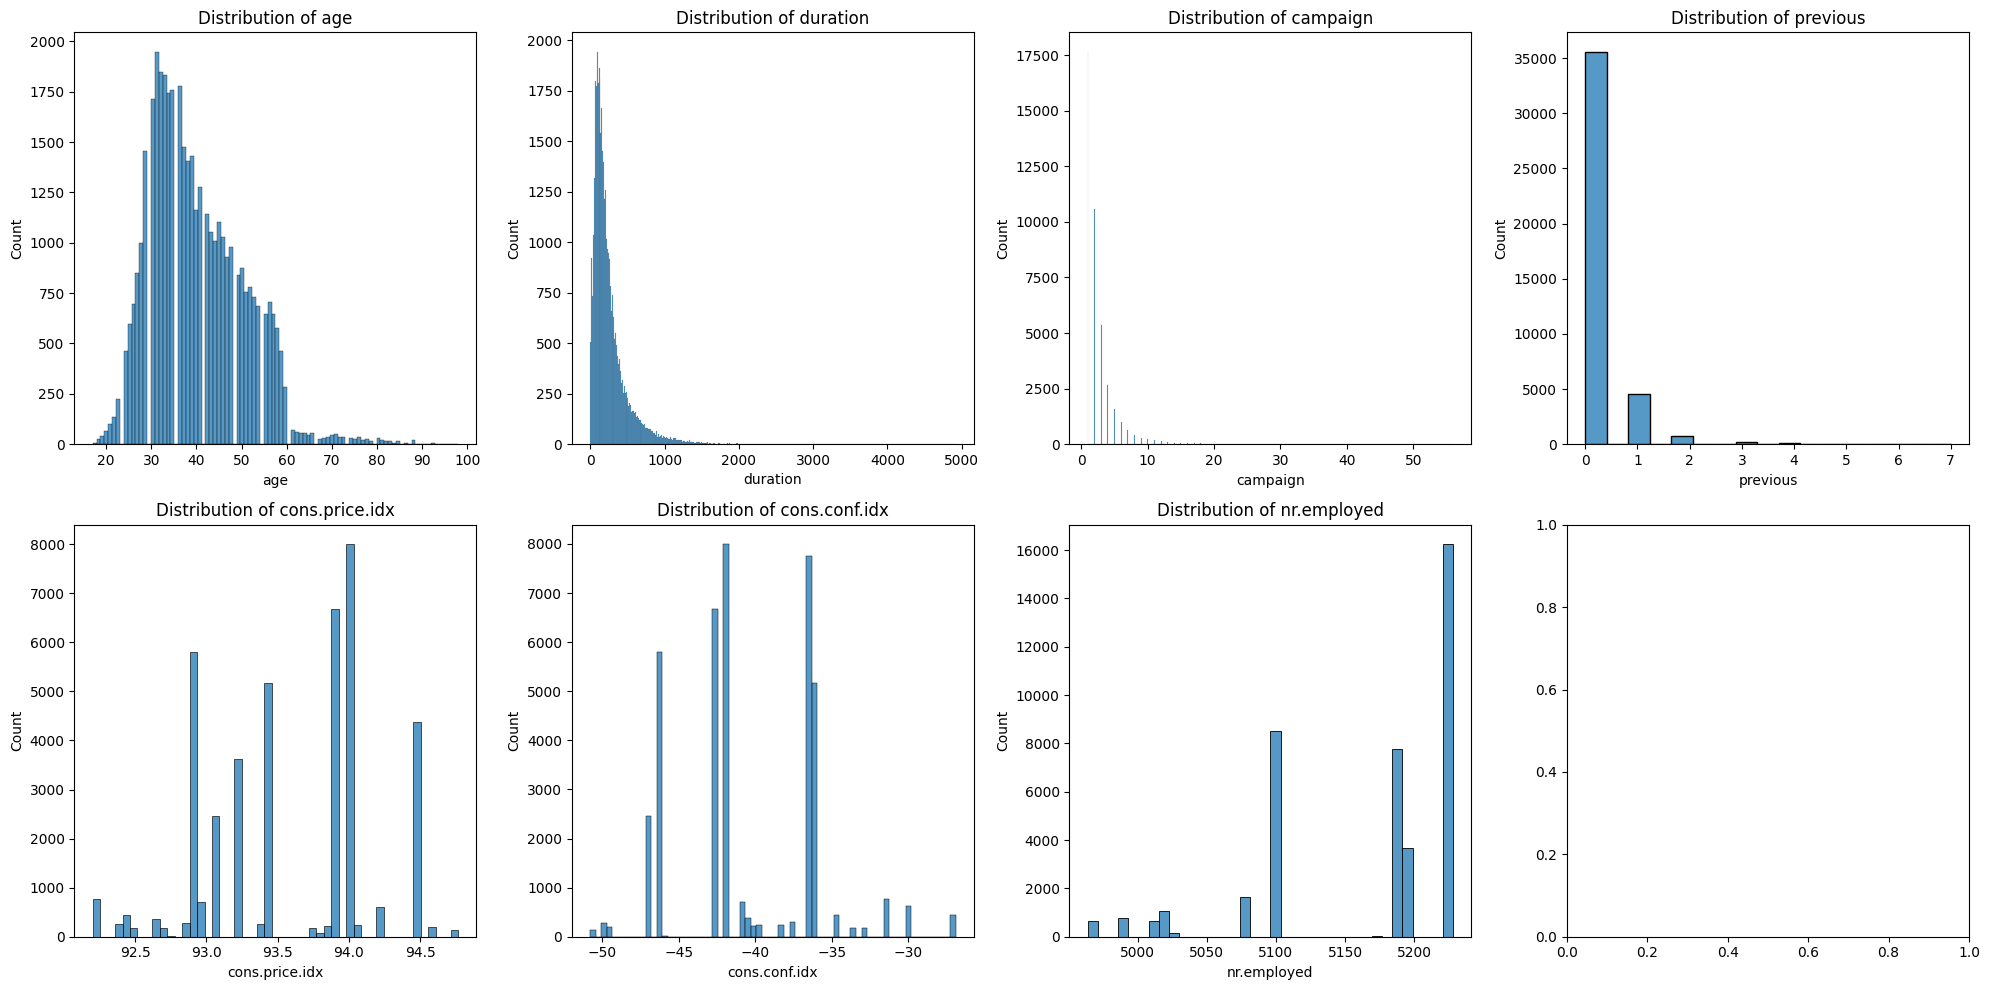

In [28]:
# Plot distribution of each feature
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for idx, feature in enumerate(selected_num_features):
    sns.histplot(data=Bank_raw_dataset, x=feature, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Interpretation of Outlier Detection Results

Analyzing the outliers for each feature:

### 1\. Age

-   Moderate number of outliers (1.14% by IQR, 0.90% by Z-score)
-   Range: 17-98 years
-   Mean (40.02) close to median (38.00), suggesting relatively symmetric distribution
-   **Recommendation**: Keep outliers as they represent valid age groups

### 2\. Duration

-   Significant outliers (7.19% by IQR, 2.09% by Z-score)
-   Large range: 0-4918 seconds
-   Mean (258.29) much higher than median (180.00), indicating right skew
-   **Recommendation**: Consider log transformation or capping at 95th percentile

### 3\. Campaign

-   Moderate outliers (5.84% by IQR, 2.11% by Z-score)
-   Range: 1-56 contacts
-   Mean (2.57) close to median (2.00)
-   **Recommendation**: Cap extreme values or bin into categories

### 4\. Previous

-   Highest percentage of outliers (13.66% by IQR, 2.58% by Z-score)
-   Range: 0-7 previous contacts
-   Strong right skew (mean 0.17, median 0.00)
-   **Recommendation**: Consider binary encoding (had previous contact or not)

### 5\. Economic Indicators (cons.price.idx, cons.conf.idx, nr.employed)

-   Almost no outliers by either method
-   Tight distributions around their means
-   **Recommendation**: Keep as is, no treatment needed

## Should we handle outliers 
- Call Duration (0-4918s): Long calls (up to 82 minutes) are valid business interactions and strongly correlate with successful conversions. Rather than treating these as outliers, they represent meaningful customer engagement patterns.

- Campaign & Previous Contacts: Multiple contacts (1-56) and previous campaign interactions (0-7) reflect legitimate sales strategies and customer relationship history. These values capture important information about customer responsiveness and potential.

- Alternative Approach: Instead of outlier treatment, consider creating meaningful derived features:

    - Duration bins (short/medium/long calls)
    - Contact intensity levels (low/medium/high)
    - Previous contact categories (none/some/frequent)

<Figure size 1600x800 with 0 Axes>

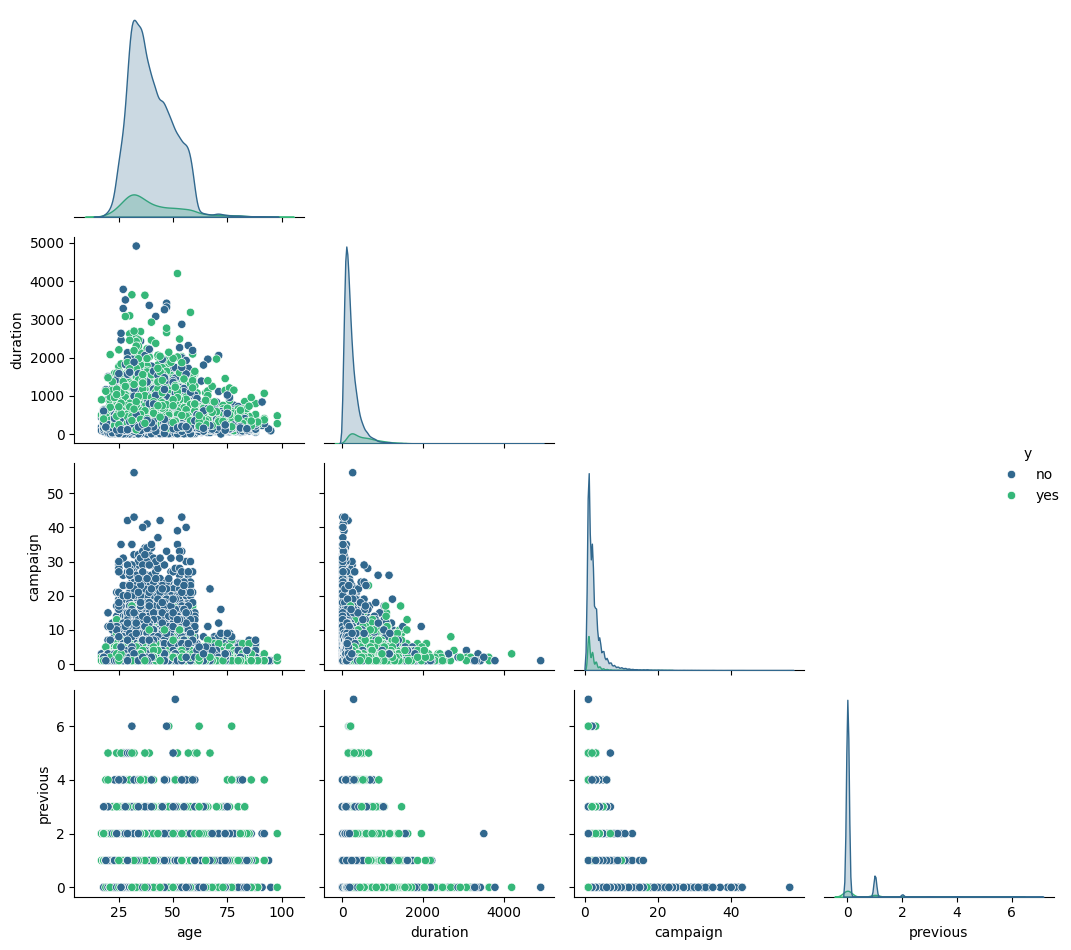

C:\Users\ashut\AppData\Local\Temp\ipykernel_23672\3202051049.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y=feature, data=Bank_raw_dataset, palette='Set2', inner='quartile')
C:\Users\ashut\AppData\Local\Temp\ipykernel_23672\3202051049.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y=feature, data=Bank_raw_dataset, palette='Set2', inner='quartile')
C:\Users\ashut\AppData\Local\Temp\ipykernel_23672\3202051049.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y=feature, data=Bank_raw_dataset, palet

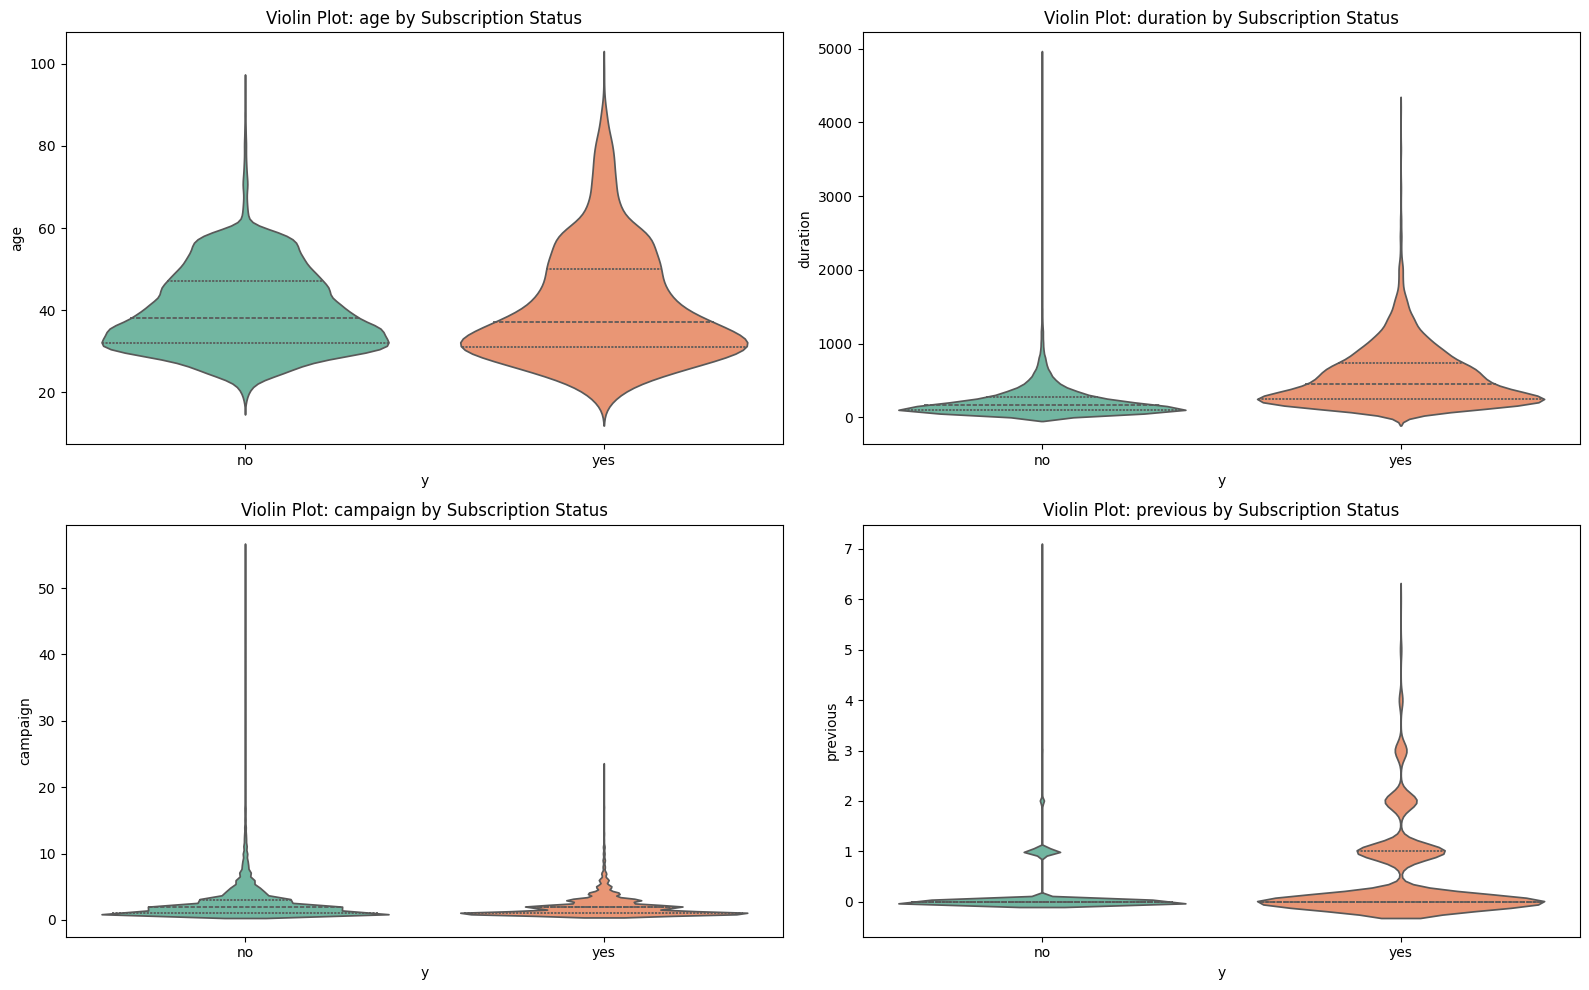

In [29]:
# Advanced visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates, andrews_curves
from scipy.stats import normaltest, shapiro

# Create a section for advanced EDA
plt.figure(figsize=(16, 8))
plt.suptitle('Advanced Visualization: Pair Plot of Key Features', fontsize=16)

# Create pair plot for key features with target coloring
key_features = ['age', 'duration', 'campaign', 'previous']
sns.pairplot(Bank_raw_dataset[key_features + ['y']], hue='y', palette='viridis', 
             diag_kind='kde', height=2.5, corner=True)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Violin plots to compare distributions by subscription status
plt.figure(figsize=(16, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='y', y=feature, data=Bank_raw_dataset, palette='Set2', inner='quartile')
    plt.title(f'Violin Plot: {feature} by Subscription Status')
plt.tight_layout()
plt.show()

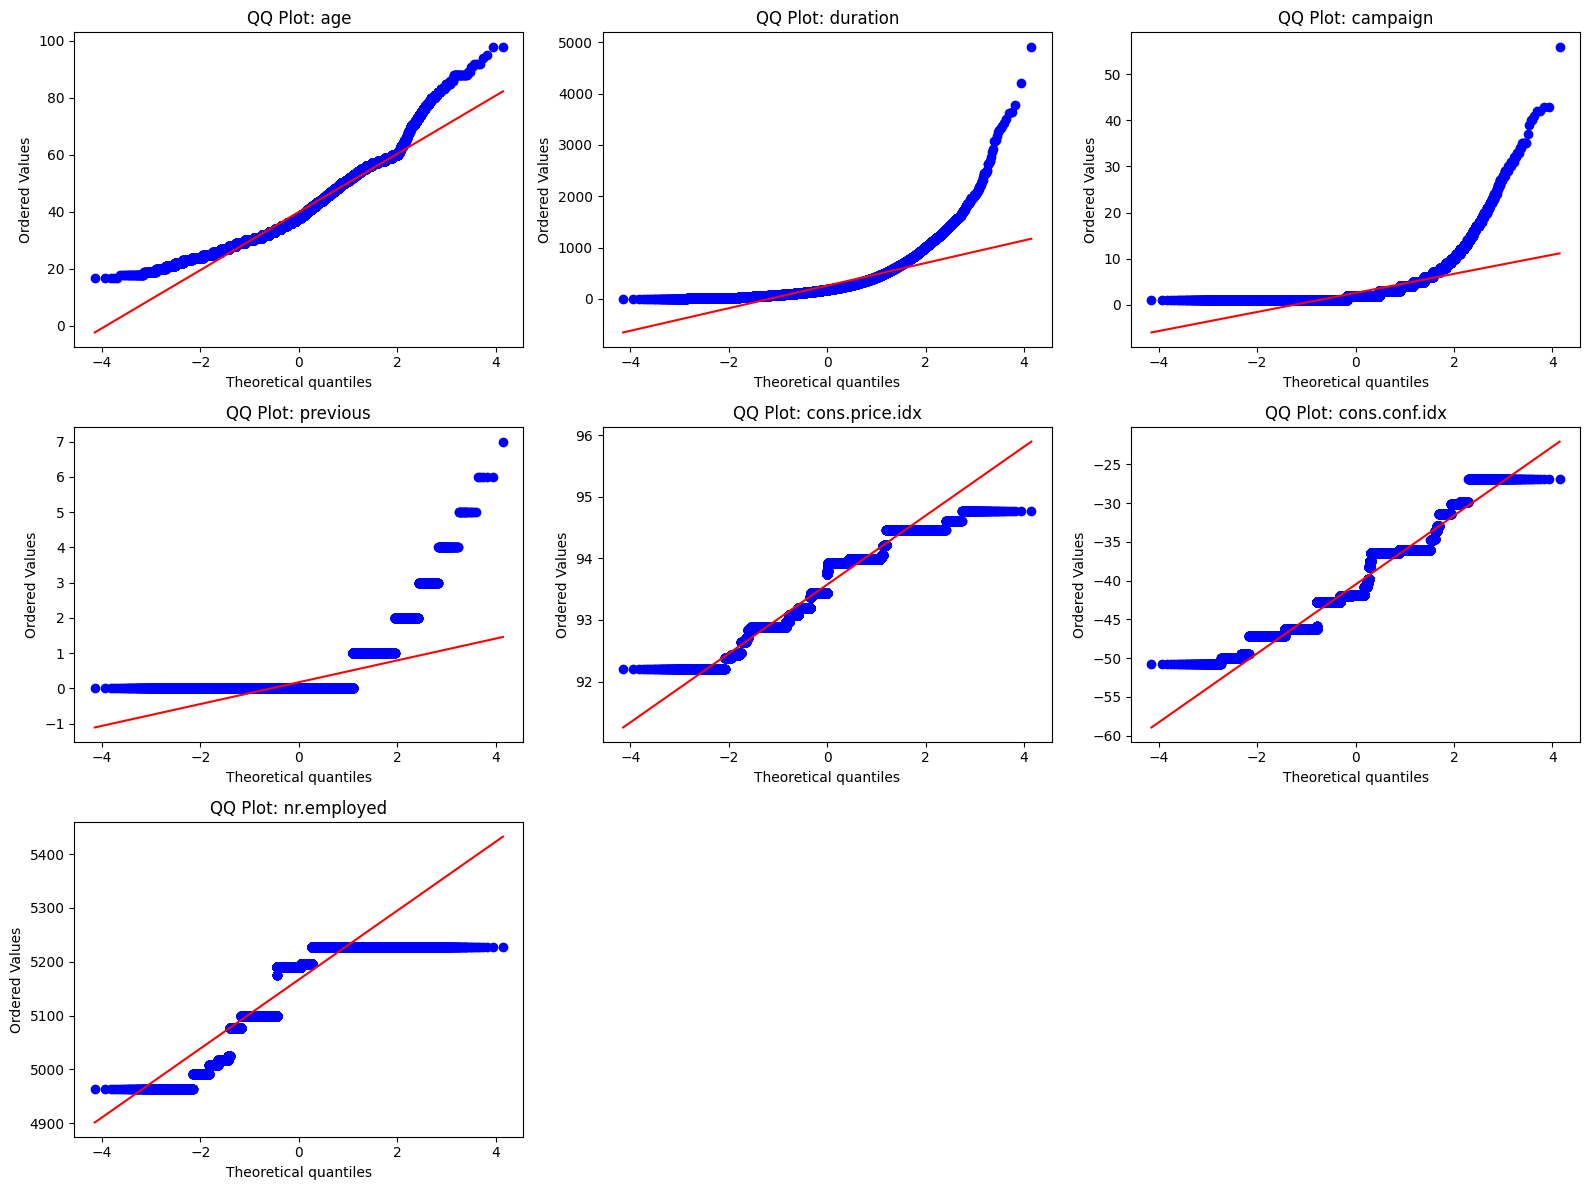

Normality Test Results (Shapiro-Wilk):
               Shapiro-Wilk p-value Normal
age                             0.0  False
duration                        0.0  False
campaign                        0.0  False
previous                        0.0  False
cons.price.idx                  0.0  False
cons.conf.idx                   0.0  False
nr.employed                     0.0  False


In [30]:
# Test for normality in numerical features
numerical_features = ['age', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']
plt.figure(figsize=(16, 12))

normality_results = {}
for i, col in enumerate(numerical_features):
    # QQ plot for visual normality assessment
    plt.subplot(3, 3, i+1)
    stats.probplot(Bank_raw_dataset[col], plot=plt)
    plt.title(f'QQ Plot: {col}')
    
    # Shapiro-Wilk test for normality
    stat, p = shapiro(Bank_raw_dataset[col].sample(min(5000, len(Bank_raw_dataset))))
    normality_results[col] = {'Shapiro-Wilk p-value': p, 
                             'Normal': p > 0.05}

plt.tight_layout()
plt.show()

# Display normality test results
normality_df = pd.DataFrame(normality_results).T
print("Normality Test Results (Shapiro-Wilk):")
print(normality_df)

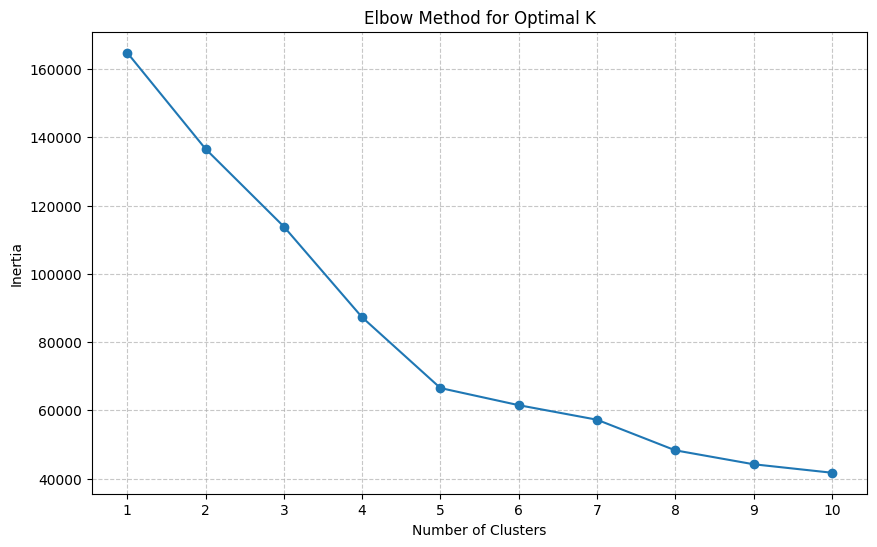

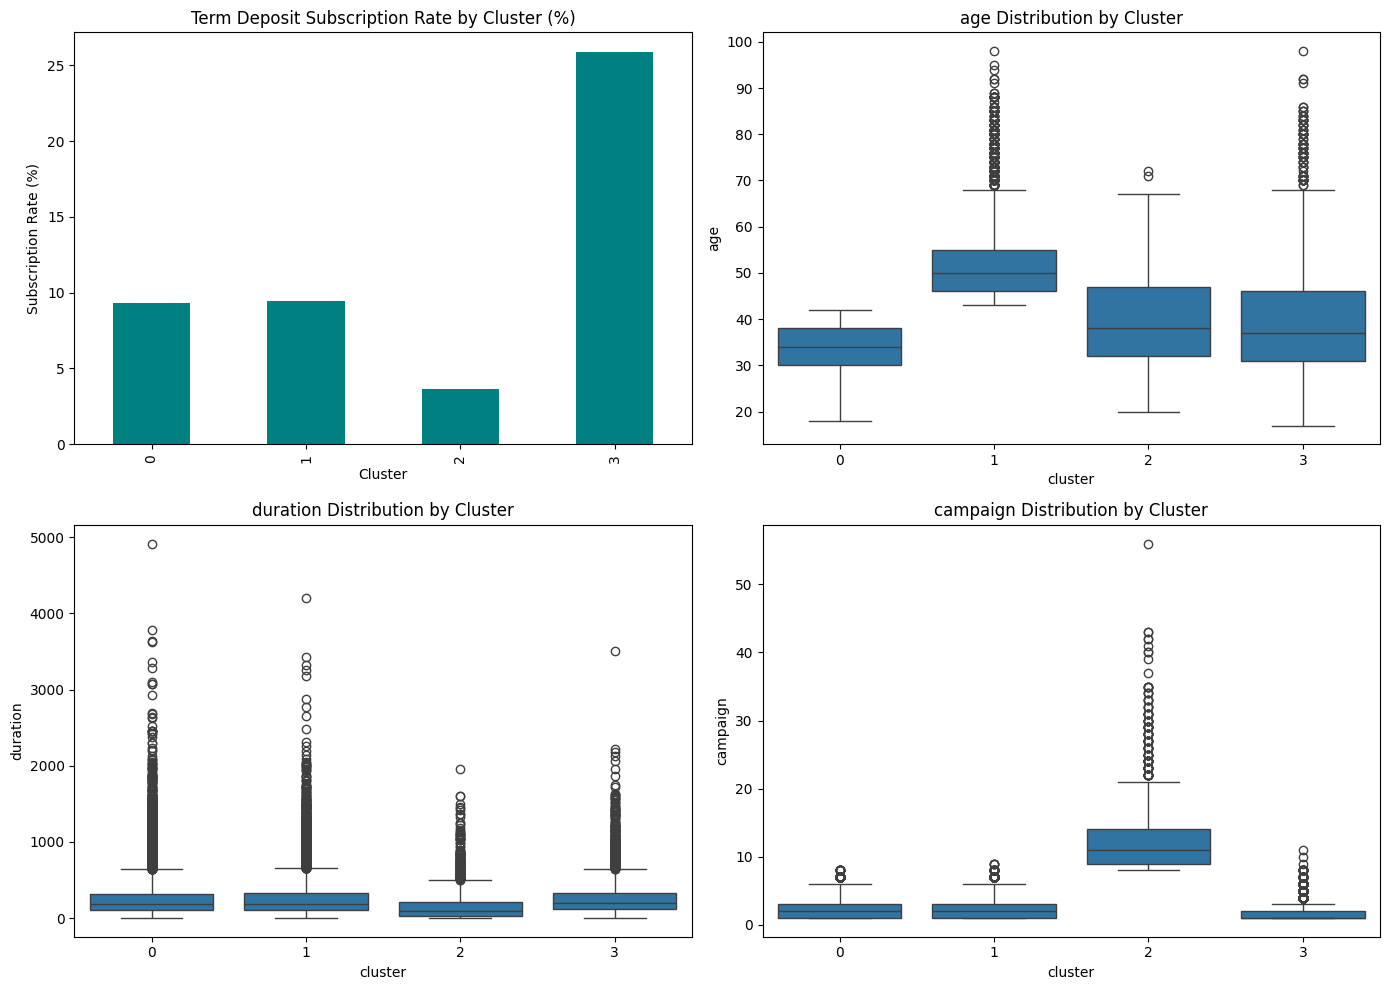

In [31]:
# Customer segmentation using K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical features for clustering
cluster_features = ['age', 'duration', 'campaign', 'previous']
X_cluster = Bank_raw_dataset[cluster_features].copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Find optimal number of clusters using Elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Use 4 clusters as an example
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to DataFrame for analysis
Bank_cluster_df = Bank_raw_dataset.copy()
Bank_cluster_df['cluster'] = clusters

# Analyze subscription rates by cluster
cluster_analysis = Bank_cluster_df.groupby('cluster')['y'].value_counts(normalize=True).unstack()
cluster_analysis = cluster_analysis.fillna(0) * 100  # Convert to percentage

# Plot cluster profiles
plt.figure(figsize=(14, 10))
# Subscription rate by cluster
plt.subplot(2, 2, 1)
cluster_analysis['yes'].plot(kind='bar', color='teal')
plt.title('Term Deposit Subscription Rate by Cluster (%)')
plt.ylabel('Subscription Rate (%)')
plt.xlabel('Cluster')

# Feature distribution by cluster
for i, feature in enumerate(['age', 'duration', 'campaign']):
    plt.subplot(2, 2, i+2)
    sns.boxplot(x='cluster', y=feature, data=Bank_cluster_df)
    plt.title(f'{feature} Distribution by Cluster')

plt.tight_layout()
plt.show()

C:\Users\ashut\AppData\Local\Temp\ipykernel_23672\217839229.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='y', data=seasonal_subscription, palette='viridis')


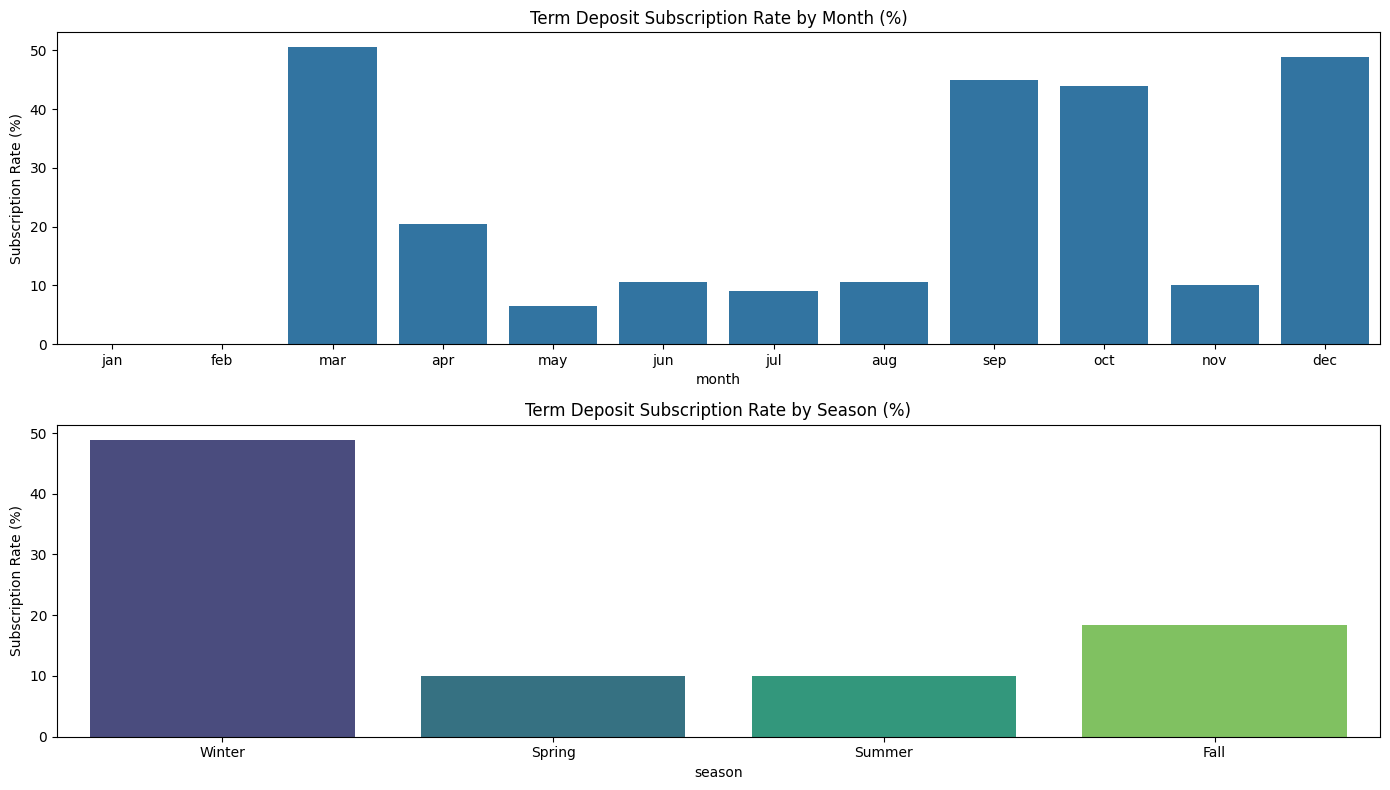

In [32]:
# Temporal pattern analysis
plt.figure(figsize=(14, 8))

# Month-based analysis
plt.subplot(2, 1, 1)
monthly_subscription = Bank_raw_dataset.groupby('month')['y'].apply(
    lambda x: (x == 'yes').mean() * 100).reset_index()
# Sort months chronologically 
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_subscription['month'] = pd.Categorical(monthly_subscription['month'], categories=month_order, ordered=True)
monthly_subscription = monthly_subscription.sort_values('month')

sns.barplot(x='month', y='y', data=monthly_subscription)
plt.title('Term Deposit Subscription Rate by Month (%)')
plt.ylabel('Subscription Rate (%)')

# Create a seasonal analysis
plt.subplot(2, 1, 2)
# Map months to seasons
Bank_raw_dataset['season'] = Bank_raw_dataset['month'].map({
    'dec': 'Winter', 'jan': 'Winter', 'feb': 'Winter',
    'mar': 'Spring', 'apr': 'Spring', 'may': 'Spring',
    'jun': 'Summer', 'jul': 'Summer', 'aug': 'Summer',
    'sep': 'Fall', 'oct': 'Fall', 'nov': 'Fall'
})

seasonal_subscription = Bank_raw_dataset.groupby('season')['y'].apply(
    lambda x: (x == 'yes').mean() * 100).reset_index()
seasonal_subscription['season'] = pd.Categorical(
    seasonal_subscription['season'], 
    categories=['Winter', 'Spring', 'Summer', 'Fall'], 
    ordered=True)
seasonal_subscription = seasonal_subscription.sort_values('season')

sns.barplot(x='season', y='y', data=seasonal_subscription, palette='viridis')
plt.title('Term Deposit Subscription Rate by Season (%)')
plt.ylabel('Subscription Rate (%)')

plt.tight_layout()
plt.show()

Variance Inflation Factors:
          Feature          VIF
4  cons.price.idx  9479.676390
6     nr.employed  9203.647925
5   cons.conf.idx    78.910669
0             age    16.026365
1        duration     2.007853
2        campaign     1.892791
3        previous     1.460211


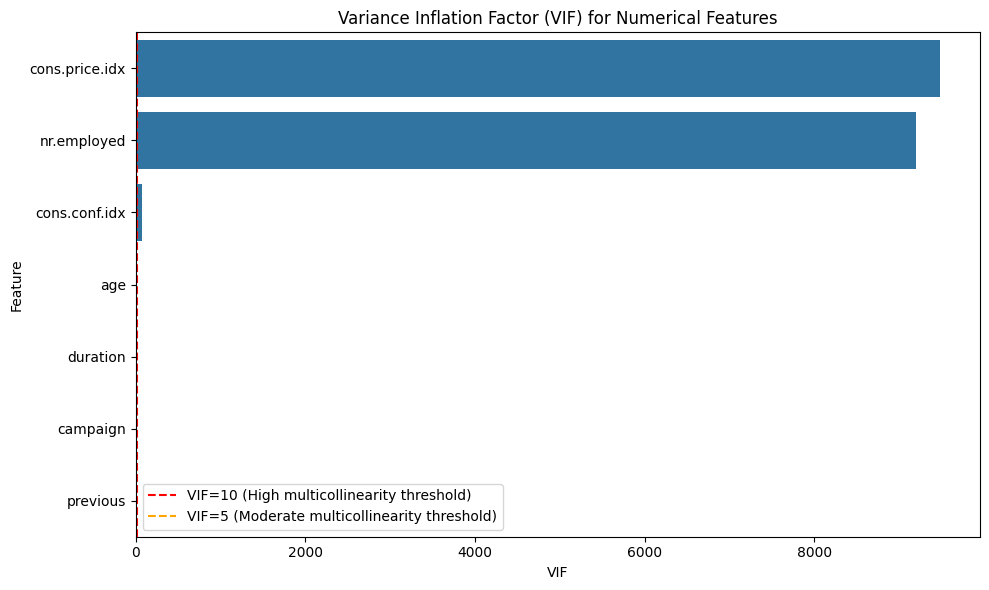

In [35]:
# Advanced multicollinearity analysis using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features
X_vif = Bank_raw_dataset[numerical_features].copy()

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort by VIF value
vif_data = vif_data.sort_values('VIF', ascending=False)
print("Variance Inflation Factors:")
print(vif_data)

# Plot VIF values
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_data)
plt.title('Variance Inflation Factor (VIF) for Numerical Features')
plt.axvline(x=10, color='red', linestyle='--', label='VIF=10 (High multicollinearity threshold)')
plt.axvline(x=5, color='orange', linestyle='--', label='VIF=5 (Moderate multicollinearity threshold)')
plt.legend()
plt.tight_layout()
plt.show()

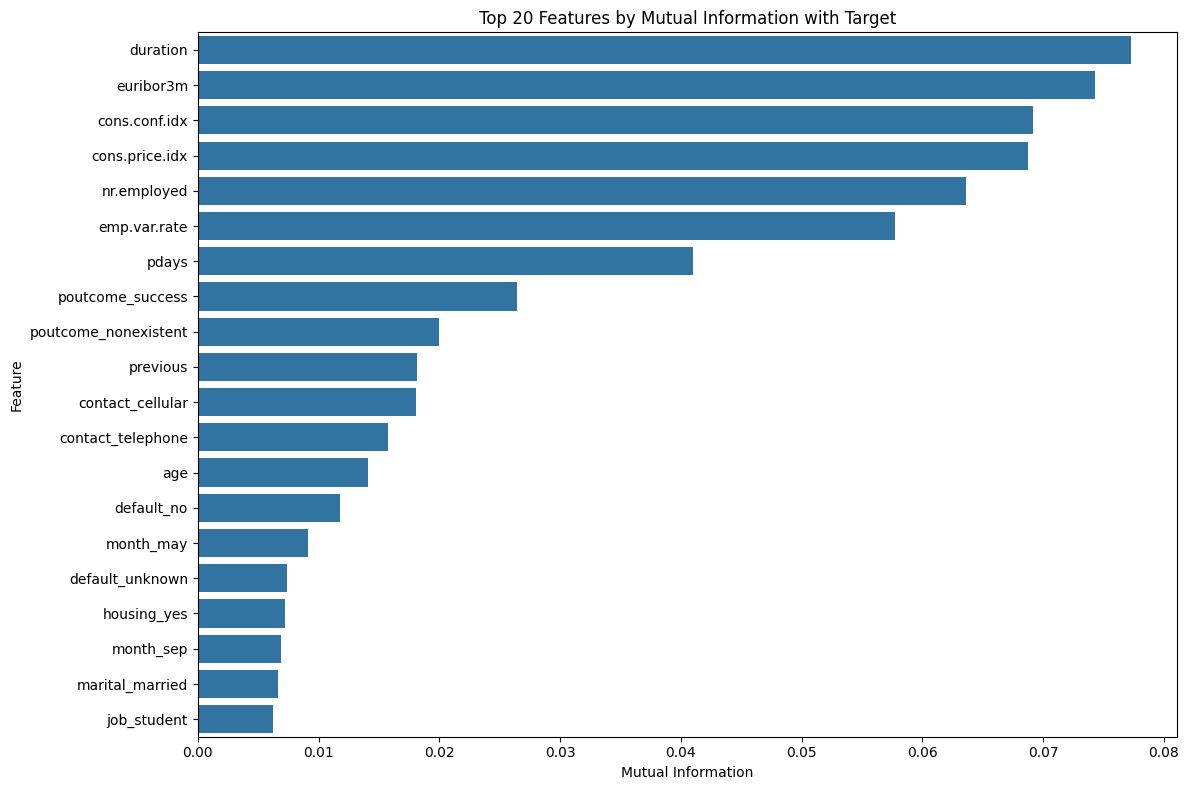

In [36]:
# Feature importance analysis using mutual information
from sklearn.feature_selection import mutual_info_classif

# Prepare data
X_categorical = pd.get_dummies(Bank_raw_dataset.select_dtypes(include='object').drop('y', axis=1))
X_numerical = Bank_raw_dataset.select_dtypes(include=['int64', 'float64'])
X_combined = pd.concat([X_numerical, X_categorical], axis=1)
y_binary = (Bank_raw_dataset['y'] == 'yes').astype(int)

# Calculate mutual information
mi_scores = mutual_info_classif(X_combined, y_binary, discrete_features=False, random_state=42)
mi_df = pd.DataFrame({'Feature': X_combined.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values('Mutual Information', ascending=False).head(20)

# Plot mutual information
plt.figure(figsize=(12, 8))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Top 20 Features by Mutual Information with Target')
plt.tight_layout()
plt.show()